In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.17.0'

In [5]:
keras.__version__

'3.4.1'

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:5000], y_train_full[:5000]
X_valid, y_valid = X_train_full[5000:], y_train_full[5000:]

In [7]:
X_train.shape

(5000, 28, 28)

In [8]:
X_train.dtype

dtype('uint8')

For simplicity, I scale the pixes down to 0-1 range

In [9]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.5

In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

You can find the name of each index [here](https://keras.io/api/datasets/fashion_mnist/)

In [53]:
class_names = [
    "T-shirt/top",
    "rouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
class_names

['T-shirt/top',
 'rouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
np.random.seed(42)
indexes = np.random.randint(len(X_train), size=40)
indexes

array([ 860, 3772, 3092,  466, 4426, 3444, 3171, 2919,  130, 1685,  769,
       2391, 2433, 1184, 4555, 3385, 4117, 4843, 2904,  474, 1082, 2558,
       2047, 2747,  975, 1806,  189, 2734, 3005, 4658, 1899, 1267, 1528,
       3202, 3556, 3890,  646, 2888, 2435,  600])

In [18]:
img_sample, label_sample = X_train[indexes], y_train[indexes]
img_sample.shape, label_sample.shape

((40, 28, 28), (40,))

In [34]:
img_sample.dtype

dtype('float64')

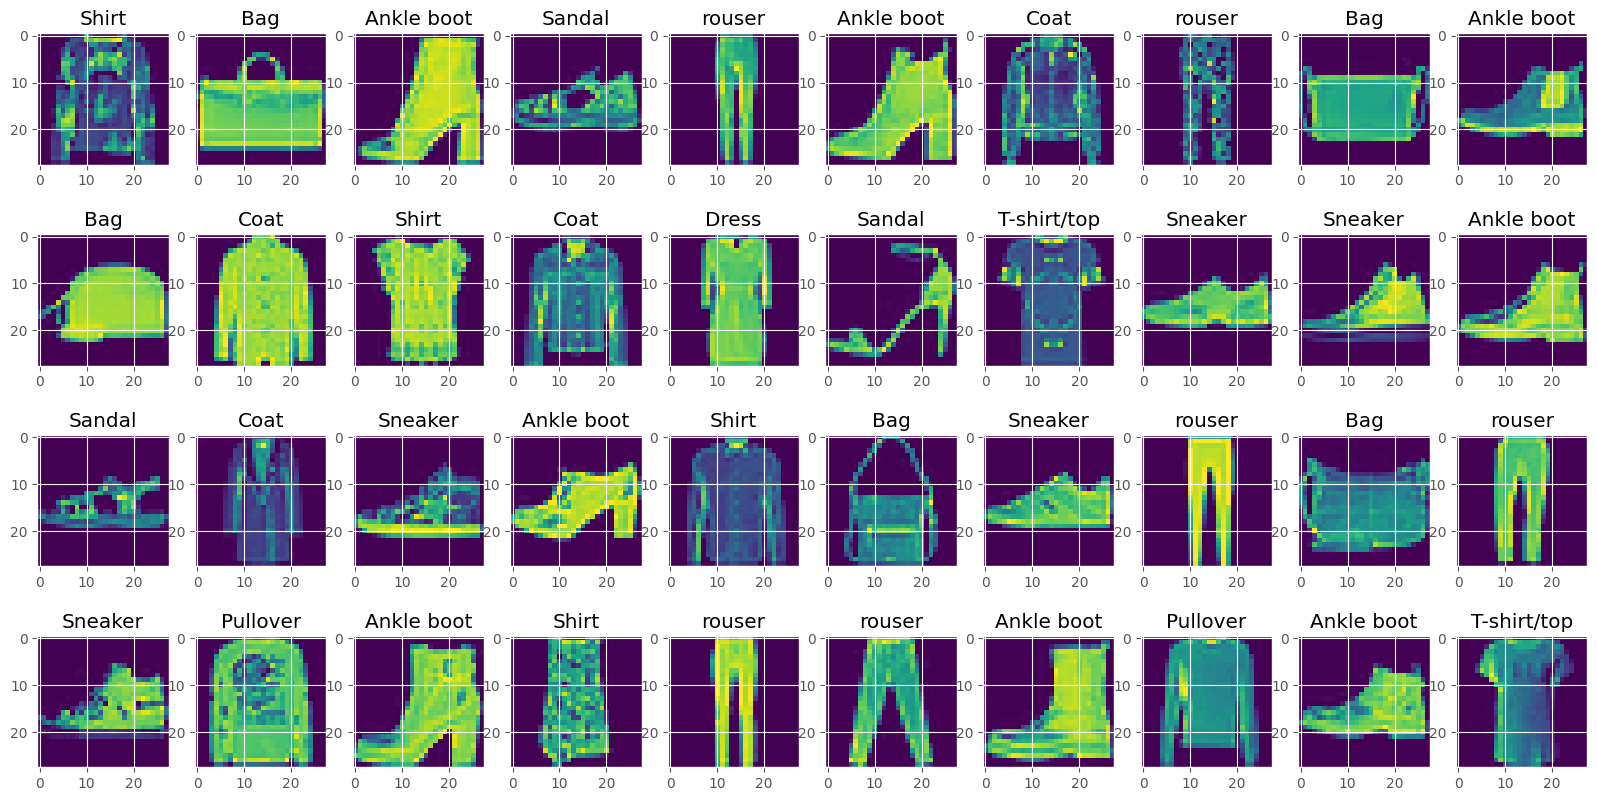

In [55]:
f, axes = plt.subplots(4, 10, figsize=(20, 10))

for i, img in enumerate(img_sample):
    ax = axes[i // 10, i % 10]
    ax.imshow(img)
    ax.set_title(class_names[label_sample[i]])
plt.show()

In [57]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [58]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [60]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

In [61]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4000 - loss: 1.8787 - val_accuracy: 0.6709 - val_loss: 1.1026
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6943 - loss: 0.9784 - val_accuracy: 0.7247 - val_loss: 0.8408
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7404 - loss: 0.7697 - val_accuracy: 0.7457 - val_loss: 0.7503
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7686 - loss: 0.6794 - val_accuracy: 0.7571 - val_loss: 0.7012
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7880 - loss: 0.6230 - val_accuracy: 0.7646 - val_loss: 0.6692
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8029 - loss: 0.5828 - val_accuracy: 0.7719 - val_loss: 0.6437
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8171 - loss: 0.5515 - val_accuracy: 0.7770 - val_loss: 0.6235
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8253 - loss: 0.5267 - val_accuracy: 0

In [64]:
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.5374,1.556883,0.670891,1.102563
1,0.7100,0.910311,0.724691,0.840808
2,0.7490,0.744805,0.745727,0.750284
3,0.7736,0.666123,0.757091,0.701198
4,0.7902,0.614921,0.764600,0.669152
5,0.8036,0.577409,0.771909,0.643742
6,0.8172,0.548044,0.777036,0.623518
7,0.8264,0.524580,0.782000,0.607344
8,0.8348,0.504621,0.787764,0.592464
9,0.8416,0.487683,0.791909,0.580082


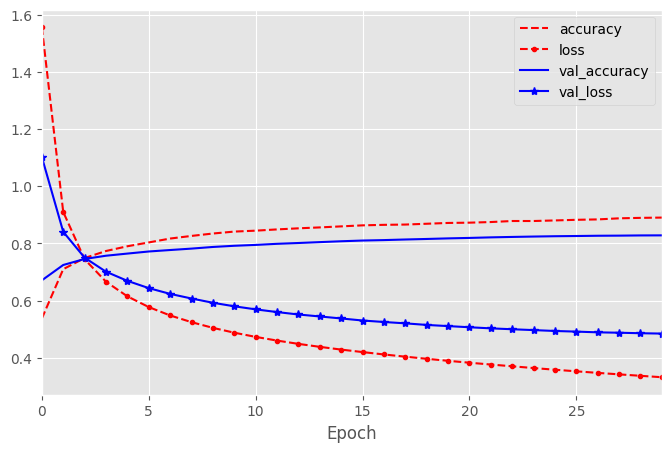

In [68]:
history_df.plot(
    figsize=(8, 5),
    xlim=[0, 29],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"],
)
plt.show()